In [371]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [372]:
import seaborn as sns

In [373]:
path =  '../input/creditcardfraud/creditcard.csv'
df = pd.read_csv(path)

In [374]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [375]:
def display_all(df):
    with pd.option_context("display.max_rows",1000, "display.max_columns",1000):
        display(df)

In [376]:
display_all(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Understanding the data:

The feature 'Time' - denotes seconds elapsed in each transaction and the first transation. 

Due to security reasons, the features details of individual featues aren't given. But there are 28 features and these features which are named from V1 to V28.
V1-V28 are Principal Components obtained form PCA - dimentionality reduction method. 

Amount - Feature amount is the Amount transaction done during that specific transaction. 

Class - The feature 'Class' is a binary feature. This feature has two values - 0 & 1. Feature 0 means there is no fraud. Feature 1 means there was a fraud on that certain transaction.


In [377]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [378]:
df.isnull().sum()/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

There are no missing values in this dataset.

In [379]:
temp = df['Class'].value_counts()
temp

0    284315
1       492
Name: Class, dtype: int64

In [380]:
tmp  = temp.to_frame()
tmp.colums = ['Class','Freq']
tmp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Class
0,284315
1,492


In [381]:
tmp.reset_index(inplace = True)
tmp.columns = ['Class', 'Freq']
tmp

,Class,Freq
0,0,284315
1,1,492


In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

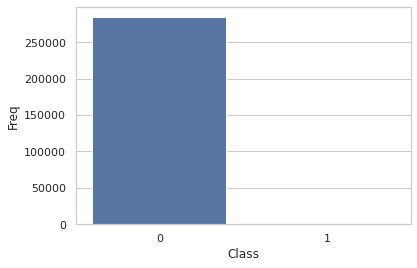

In [383]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Class", y="Freq", data=tmp)

Making this BarGraph Interactive

In [384]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [385]:
gr = go.Bar(
    x = tmp['Class'],
    y = tmp['Freq'],
    name = "Credit Card Fraud Detection - data (fraud - 1, clean - 0)",
    marker = dict(color = "Red"),
    text = tmp.Freq
)

data = [gr]

In [386]:
layout = dict(title = 'Credit Card Fraud Class - Unbalanced Data (0 - Clean, 1 - Fraud)',
             xaxis = dict(title = "Class", showticklabels = True),
             yaxis = dict(title = "Number of Transactions"),
             hovermode = 'closest',
             width = 600
             )

In [387]:
fig = dict(data = data, layout = layout)
plotly.offline.iplot(fig, filename = 'class')

In [388]:
x = df.Class.value_counts()
s = x[0] + x[1]
print(f"Fradulent Value Percent : {round((df.Class.value_counts()[0]/s)*100,2)}%")
print(f"Clean Value Percent : {round((df.Class.value_counts()[1]/s)*100,2)}%")

Fradulent Value Percent : 99.83%
Clean Value Percent : 0.17%


# **EDA**

# Transactions in time

In [389]:
cl_0 = df.loc[df['Class'] == 0]['Time']
cl_1 = df.loc[df['Class'] == 1]['Time']

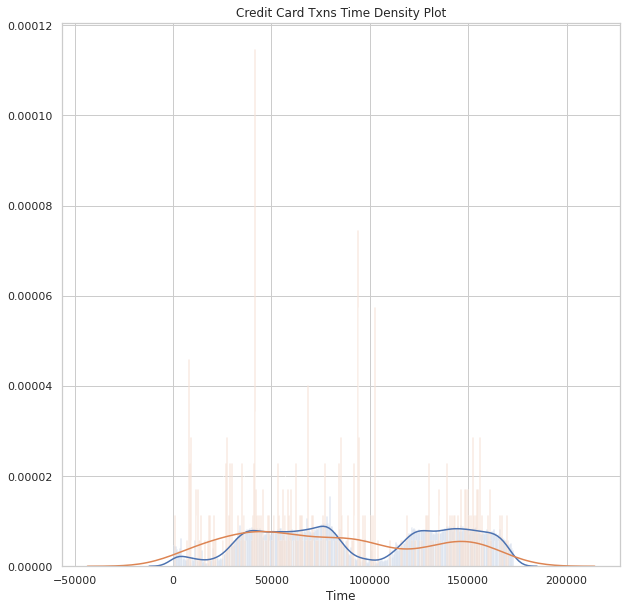

In [390]:
plt.figure(figsize = (10,10))
plt.title('Credit Card Txns Time Density Plot')
sns.set_color_codes("pastel")
sns.distplot(cl_0, kde = True, bins = 480)
sns.distplot(cl_1, kde = True, bins = 480)
plt.show()

In [391]:
import plotly.figure_factory as ff

In [392]:
hist_data = [cl_0,cl_1]
group_labels = ['Not Fraud','Fraud']
fig = ff.create_distplot(hist_data, group_labels, show_hist = False, show_rug = False)
fig['layout'].update(title = 'Credit Card Txns Time Density Plot', xaxis  = dict(title = 'Time [sec]'))
plotly.offline.iplot(fig, filename = 'dist_only')

Fradulent transactions have a distribution more even than valid txns - are equally ditributed in time, including the low real txn times 

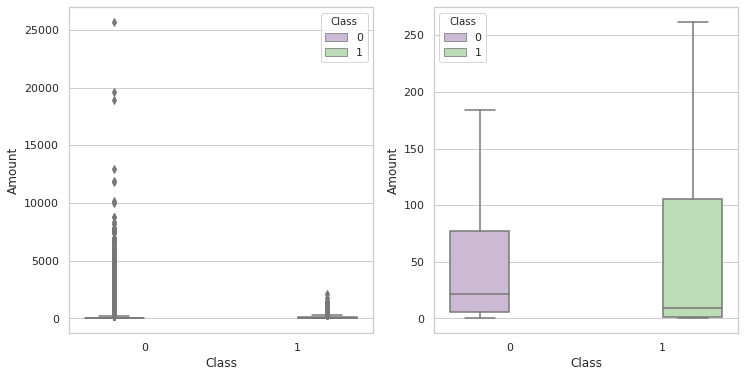

In [393]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,6))
s = sns.boxplot(ax = ax1, x = "Class", y = "Amount", hue = "Class", data = df, palette = "PRGn", showfliers = True)
s = sns.boxplot(ax = ax2, x = "Class", y = "Amount", hue = "Class", data = df, palette = "PRGn", showfliers = False)
plt.show()

In [394]:
tmp1 = df[['Amount','Class']].copy()
cl_0 = tmp1.loc[tmp1['Class'] == 0]['Amount']
cl_1 = tmp1.loc[tmp1['Class'] == 1]['Amount']
cl_0.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [395]:
cl_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Plotting the fradulent txns against time.

In [396]:
fraud = df.loc[df['Class'] == 1]

In [397]:
a = go.Scatter(
    x = fraud['Time'],
    y = fraud['Amount'],
    name = 'Amount',
    marker = dict(
        color = 'rgb(238,23,11)',
        line = dict(color = 'red',
                   width = 1),
        opacity = 0.5,),
    text = fraud['Amount'],
    mode = "markers")

In [398]:
data = [a]

In [399]:
layout = dict(title = 'Amount of Fradulent Txns',
             xaxis = dict(title = 'Time [sec]', showticklabels = True),
             yaxis = dict(title = 'Amount'),
             hovermode = 'closest')

In [400]:
fig = dict(data = data, layout = layout)
plotly.offline.iplot(fig, filename = 'fraud-amount')

# Features Correlation

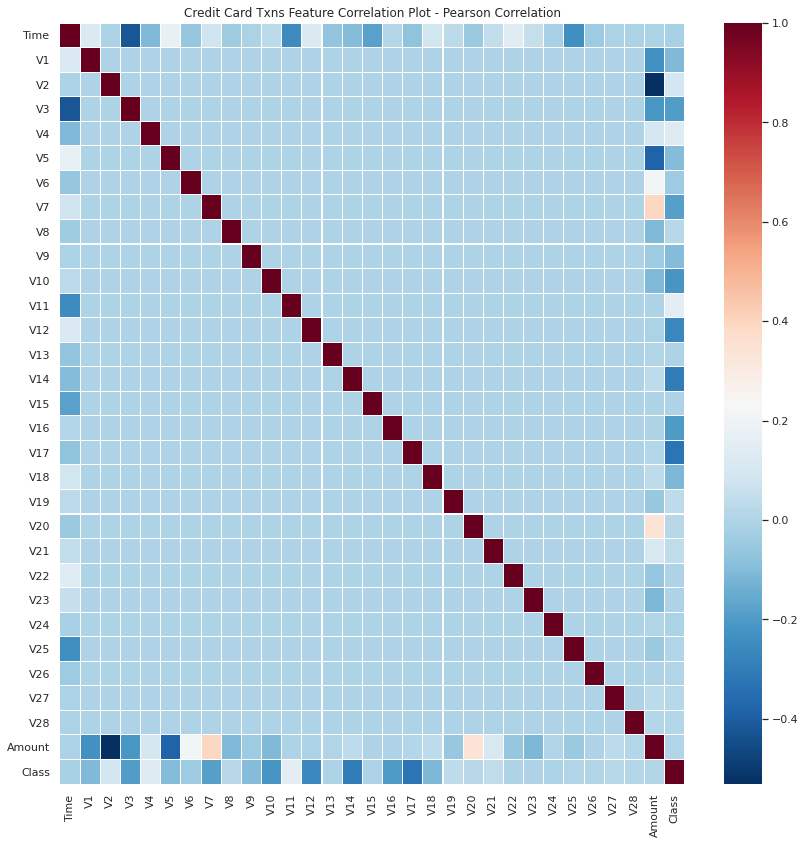

In [401]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Txns Feature Correlation Plot - Pearson Correlation')
corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            linewidth = 0.1,
            cmap = "RdBu_r"
#             annot = True
            )
plt.show()

The blues in the heatmap suggest there is no positive correlation between any of the features from V1-V28.

Getting the slightest hint,
Positive correlations - 

<b>V7 and Amount</b>

<b>V20 and Amount</b>

There are a certain places where there are notable negative correlation, with

<b>Time</b> and <b>V3</b>

<b>Amount</b> and <b>V2</b> 

Plotting the Correlated and Inverse Correlated values on the same graph. 

Starting with the Positive Correlations (aka Direct Correlations)

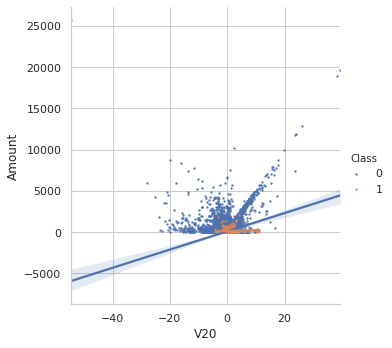

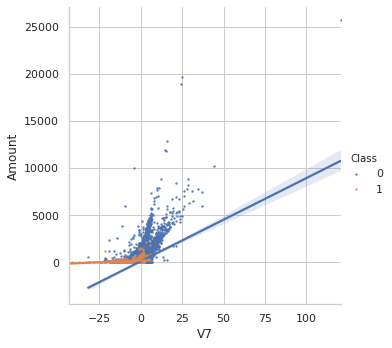

In [402]:
s = sns.lmplot(x = 'V20',
               y = 'Amount',
               data = df,
               hue = 'Class',
               fit_reg = True,
               scatter_kws = {'s':2}
              )

s = sns.lmplot(x = 'V7',
               y = 'Amount',
               data = df,
               hue = 'Class',
               fit_reg = True,
               scatter_kws = {'s':2}
              )
plt.show()

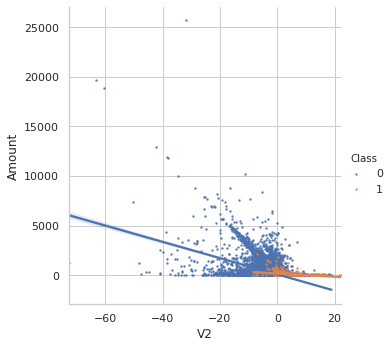

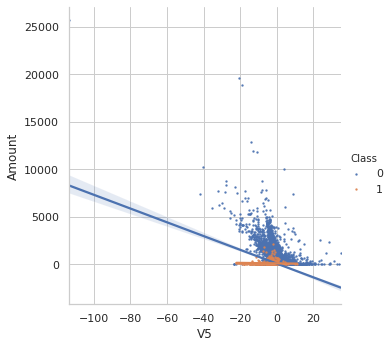

In [403]:
s = sns.lmplot(x = 'V2',
               y = 'Amount',
               data = df,
               hue = 'Class',
               fit_reg = True,
               scatter_kws = {'s':2}
              )

s = sns.lmplot(x = 'V5',
               y = 'Amount',
               data = df,
               hue = 'Class',
               fit_reg = True,
               scatter_kws = {'s':2}
              )
plt.show()

Confirmation that the two couples are inversely correlated. (cl_0 & cl_1)

# Feature Density Plot

In [404]:
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

In [405]:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



<Figure size 432x288 with 0 Axes>

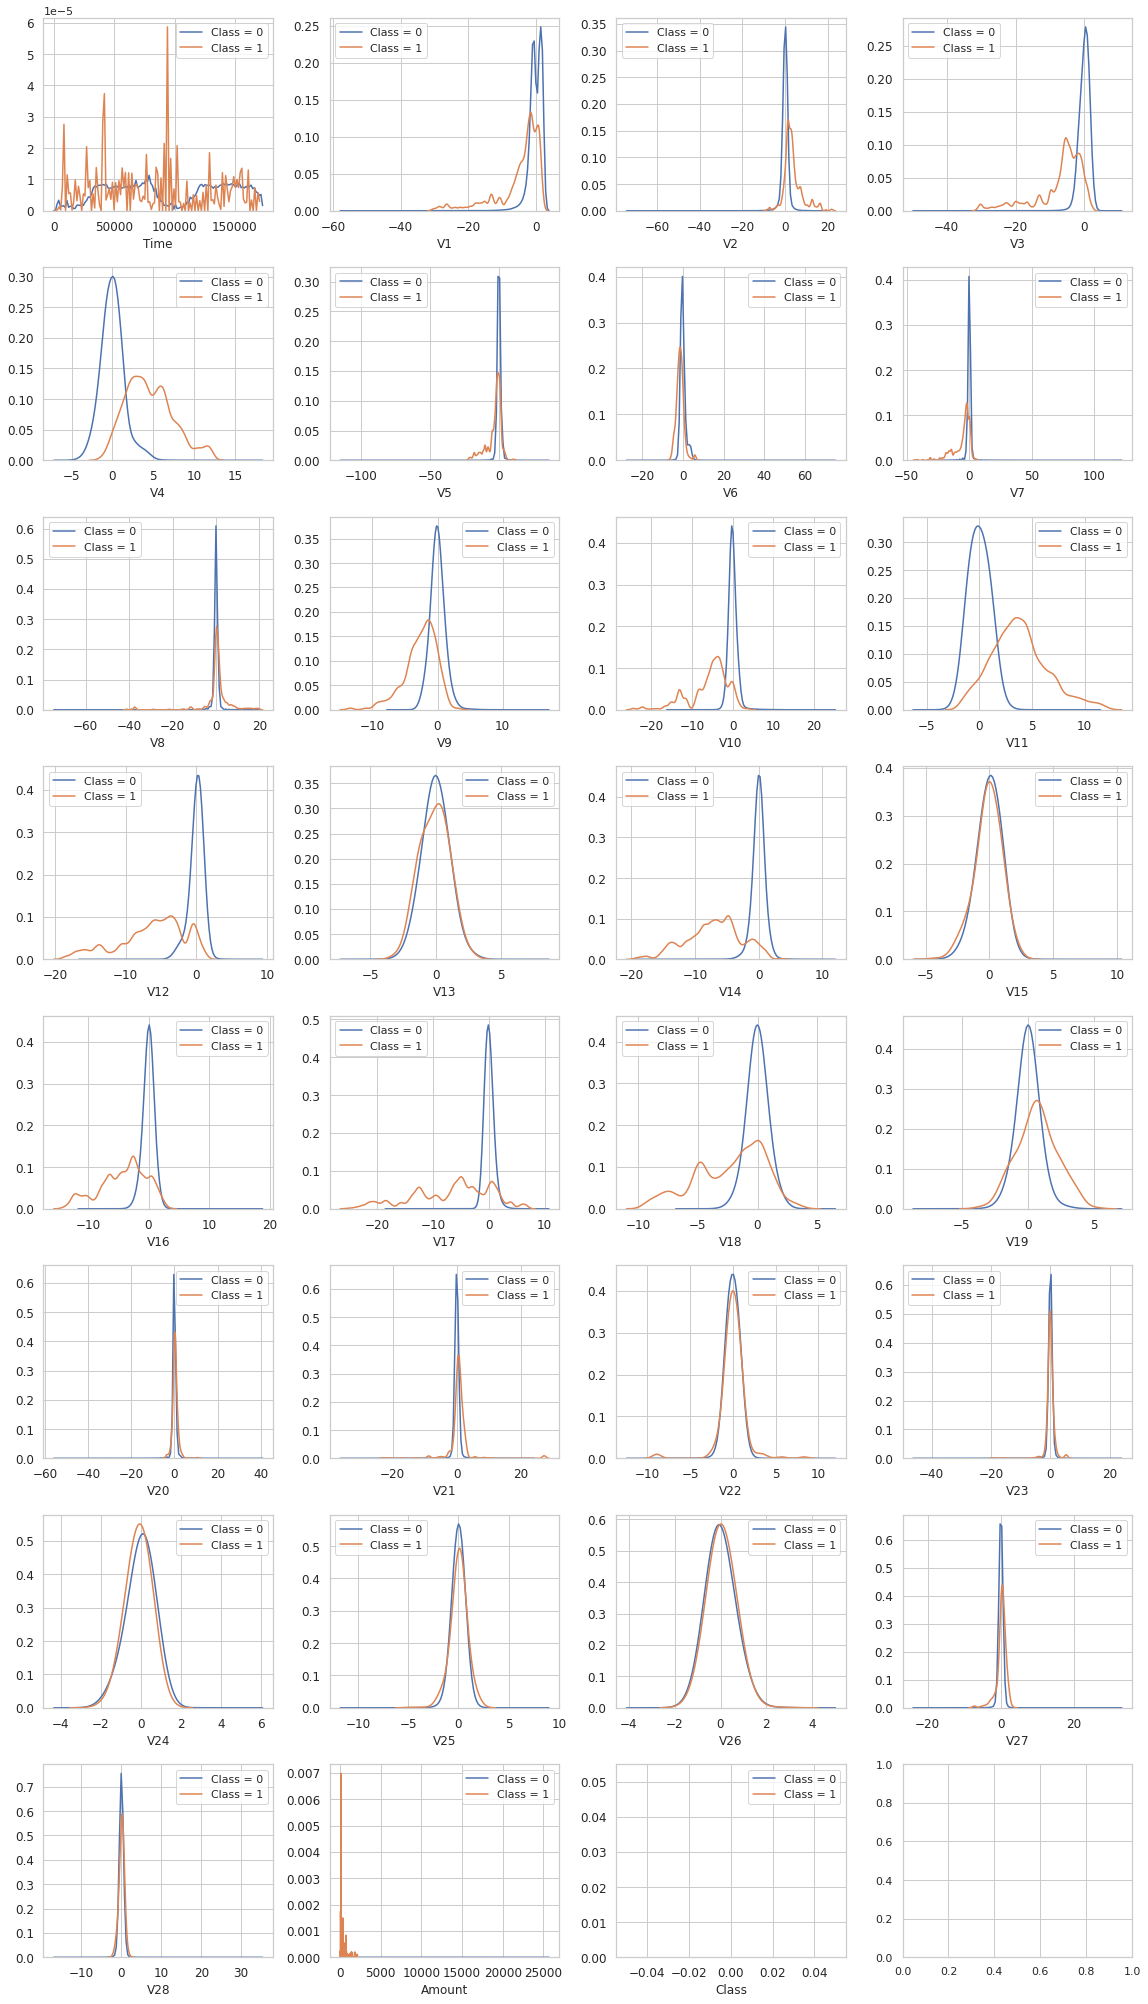

In [406]:
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize = (16,28))

i=0
var = df.columns.values
for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.tight_layout()
plt.show()

For classes 0 & 1: 

> Features V4 and V11 have clearly separated values.
> 
> Features V12, V14, V18 are partially separed. 
> 
> Features V1, V2, V3, V10 are distinct. 
> 
> Features V25, V26, V28 have similar profiles. 

In [407]:
acc_li = []
auc_li = []

# Predictive Models

In [408]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [409]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [410]:
RFC_Metric = 'gini' #Metric in RF

valid_size = 0.20
test_size = 0.20

kf = 5

randomstate = 2018

In [411]:
df.columns[:-1]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [412]:
target = 'Class'
predictors = df.columns[:-1]

In [413]:
train_df, test_df = train_test_split(df, 
                                     test_size = test_size,
                                     random_state = randomstate,
                                     shuffle = True)

In [414]:
train_df, valid_df = train_test_split(df, test_size = valid_size, 
                                      random_state = randomstate,
                                      shuffle = True )

# Random Forest

In [415]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92870,64147.0,-0.639689,0.999967,1.449687,1.381592,-0.196913,0.001674,0.834650,0.009472,-0.251383,...,-0.007281,0.323076,-0.081904,0.426820,-0.141606,-0.254721,0.330366,0.188553,71.33,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
193610,130212.0,2.118051,-1.847058,-0.051490,-1.570773,-1.892229,0.155288,-1.881601,0.185238,-0.762622,...,-0.087908,0.174339,0.255677,-0.499525,-0.563995,-0.239315,0.055737,-0.036884,60.00,0
35775,38257.0,0.766274,-1.145390,0.857432,0.379459,-1.314489,0.132728,-0.529121,0.201428,1.343793,...,-0.093072,-0.497909,-0.059808,0.141480,-0.049919,0.953375,-0.063672,0.044809,216.20,0
251893,155549.0,-0.065119,1.075350,-0.985967,-0.042260,0.235107,-1.257180,0.767013,0.150977,-0.179045,...,0.361910,0.945477,-0.019850,-0.180283,-0.348097,-0.145189,-0.018516,0.041948,55.00,0


In [416]:
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132514,80015.0,-1.130231,0.716230,0.560581,-0.818383,0.012762,-1.456391,0.989268,0.128520,-0.853739,...,0.138820,-0.026007,-0.064615,0.449277,0.205976,0.926258,-0.193324,-0.023539,79.00,0
231874,146958.0,0.887172,-2.177127,-2.365565,0.406678,-0.194711,-0.116013,0.812617,-0.257809,0.189188,...,0.591279,0.313482,-0.536556,0.285536,-0.130695,0.701904,-0.220749,0.028341,627.23,0
240972,150826.0,-7.752743,6.396263,-5.797765,-0.932329,-3.551210,-2.022925,-2.709679,4.139447,2.034678,...,0.236729,0.775367,0.634039,-0.073460,0.319821,-0.133871,0.843371,0.913733,6.59,0
91983,63715.0,1.039534,-1.071582,0.434023,-0.460506,-1.106821,-0.103705,-0.562238,0.076647,-0.714621,...,0.149235,0.215976,-0.104836,0.253930,0.374193,-0.258005,0.001180,0.024208,141.00,0
225669,144345.0,-9.742090,-8.480402,-3.582175,1.337566,-3.465308,4.292190,5.893034,-1.190614,1.133534,...,-2.137572,-1.427034,-2.957343,-0.456807,-0.117976,0.322449,0.407214,2.095218,1690.57,0


In [417]:
valid_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132514,80015.0,-1.130231,0.716230,0.560581,-0.818383,0.012762,-1.456391,0.989268,0.128520,-0.853739,...,0.138820,-0.026007,-0.064615,0.449277,0.205976,0.926258,-0.193324,-0.023539,79.00,0
231874,146958.0,0.887172,-2.177127,-2.365565,0.406678,-0.194711,-0.116013,0.812617,-0.257809,0.189188,...,0.591279,0.313482,-0.536556,0.285536,-0.130695,0.701904,-0.220749,0.028341,627.23,0
240972,150826.0,-7.752743,6.396263,-5.797765,-0.932329,-3.551210,-2.022925,-2.709679,4.139447,2.034678,...,0.236729,0.775367,0.634039,-0.073460,0.319821,-0.133871,0.843371,0.913733,6.59,0
91983,63715.0,1.039534,-1.071582,0.434023,-0.460506,-1.106821,-0.103705,-0.562238,0.076647,-0.714621,...,0.149235,0.215976,-0.104836,0.253930,0.374193,-0.258005,0.001180,0.024208,141.00,0
225669,144345.0,-9.742090,-8.480402,-3.582175,1.337566,-3.465308,4.292190,5.893034,-1.190614,1.133534,...,-2.137572,-1.427034,-2.957343,-0.456807,-0.117976,0.322449,0.407214,2.095218,1690.57,0


GINI = 2*(AUC) - 1

AUC = Area Under the Curve for ROC (Receiver Operating Characteristic)

In [418]:
m = RandomForestClassifier(n_jobs = -1, 
                           n_estimators = 100
#                            criterion = RFC_Metric
                          )

In [419]:
%%time
m.fit(train_df[predictors], train_df[target].values)

CPU times: user 6min 19s, sys: 267 ms, total: 6min 20s
Wall time: 1min 38s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [420]:
%%time
preds = m.predict(valid_df[predictors])
preds

CPU times: user 1.1 s, sys: 11.1 ms, total: 1.11 s
Wall time: 517 ms


array([0, 0, 0, ..., 0, 0, 0])

In [421]:
from sklearn.metrics import accuracy_score
round(accuracy_score(valid_df[target], preds),4)


0.9995

In [422]:
from sklearn.metrics import confusion_matrix
    
confusion_matrix(valid_df[target], preds)

array([[56857,     5],
       [   23,    77]])

In [423]:
%%time
m = RandomForestClassifier(n_jobs = -1, n_estimators=50, bootstrap = False)
m.fit(train_df[predictors], train_df[target].values)

CPU times: user 5min 16s, sys: 321 ms, total: 5min 16s
Wall time: 1min 22s


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [424]:
preds = m.predict(valid_df[predictors])


In [425]:
accuracy_score(valid_df[target], preds)

0.9995786664794073

In [426]:
%%time
m = RandomForestClassifier(n_jobs = -1, n_estimators=20, bootstrap = False, min_samples_leaf = 3, max_features = 0.5)
m.fit(train_df[predictors], train_df[target].values)

CPU times: user 5min 33s, sys: 187 ms, total: 5min 33s
Wall time: 1min 29s


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [427]:
m.predict(valid_df[predictors])

array([0, 0, 0, ..., 0, 0, 0])

In [428]:
acc_rf = accuracy_score(valid_df[target],preds)
acc_rf
acc_li.append(acc_rf)

RandomForestClassifier Model maybe overfitting.


<b>Feature Importance</b>

<u>property feature_importances_</u>

The impurity-based feature importances.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

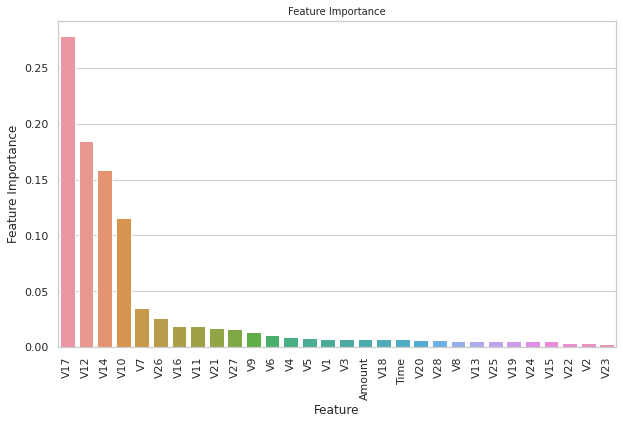

In [429]:
tmp = pd.DataFrame({'Feature': predictors,
                        'Feature Importance' : m.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance' , ascending = False)
plt.figure(figsize = (10,6))
plt.title('Feature Importance', fontsize = 10)
s = sns.barplot(x = 'Feature', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

In [430]:
tmp[:7]
#These are the most important features.

,Feature,Feature Importance
17,V17,0.278165
12,V12,0.184666
14,V14,0.158900
10,V10,0.115618
7,V7,0.034622
26,V26,0.025593
16,V16,0.018734


<b>Confusion Matrix</b>

In [431]:
cmx = confusion_matrix(valid_df[target], preds)

print(f"True Positives are : {cmx[0,0]}")
print(f"True Negatives are : {cmx[1,0]}")
print(f"False Positives are : {cmx[0,1]}")
print(f"False Negatives are : {cmx[1,1]}")


True Positives are : 56859
True Negatives are : 21
False Positives are : 3
False Negatives are : 79


In [432]:
unique, counts = np.unique(preds, return_counts = True)
y = np.asarray((unique, counts)).T

print(f"Number of 0's are {y[0][1]}")
print(f"Number of 1's are {y[1][1]}")

Number of 0's are 56880
Number of 1's are 82


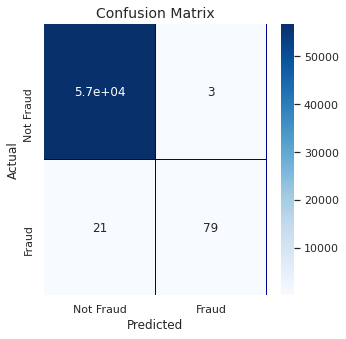

In [433]:
cm = pd.crosstab(valid_df[target].values, preds, 
                 rownames=['Actual'], colnames = ['Predicted'])

fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))
sns.heatmap(cm,
            xticklabels = ['Not Fraud', 'Fraud'],
            yticklabels = ['Not Fraud', 'Fraud'],
            annot = True,
            ax = ax1,
            linewidth = .2,
            linecolor = "Darkblue",
            cmap = "Blues")
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

<b>Type I error and Type II error: </b>

We need to clarify that confusion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

<b><b>Null Hypothesis (H0)</b></b> - The transaction is not a fraud.

<b>Alternative Hypothesis (H1)</b> - The transaction is a fraud.

<b>Type I error</b> - You reject the null hypothesis when the null hypothesis is actually true.
<b>Type II error</b> - You fail to reject the null hypothesis when the the alternative hypothesis is true.

<b>Cost of Type I error</b> - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.

<b>Cost of Type II error</b> - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

<b>Calculating the AUC Score - Area Under Curve Score</b>:

In [434]:
from sklearn.metrics import roc_auc_score

In [435]:
auc_rf = round(roc_auc_score(valid_df[target].values,preds),4)
auc_li.append(auc_rf)

The ROC-AUC score obtained with *RandomForrestClassifier* is 0.89.

In [436]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [437]:
def compute_roc_plot(y_true, y_pred, plot=False):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()


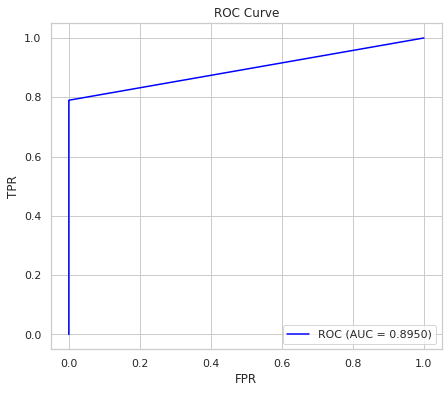

In [438]:
compute_roc_plot(valid_df[target].values,preds, plot = True )

# Adaboost Classifier

AdaboostClassifier stands for Adaptive Boosting Classifier

<b>Model Preparation</b>

In [439]:
from sklearn.ensemble import AdaBoostClassifier

In [440]:
m = AdaBoostClassifier(algorithm = 'SAMME.R',
                       learning_rate = 0.8,
                       n_estimators = 50)

In [441]:
%%time
m.fit(train_df[predictors], train_df[target].values)

CPU times: user 1min 16s, sys: 16.3 ms, total: 1min 16s
Wall time: 1min 16s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=50, random_state=None)

In [442]:
%%time
predss = m.predict(valid_df[predictors])
predss

CPU times: user 616 ms, sys: 2.01 ms, total: 618 ms
Wall time: 615 ms


array([0, 0, 0, ..., 0, 0, 0])

In [443]:
acc_ada = accuracy_score(valid_df[target],predss)
acc_ada
acc_li.append(acc_ada)

<b>Features Importance</b>

In [444]:
tmp = pd.DataFrame({'Feature' : predictors,
                   'Feature Importance' : m.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance', ascending = False)

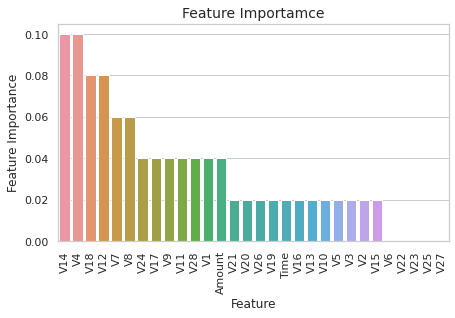

In [445]:
plt.figure(figsize = (7,4))
plt.title('Feature Importamce', fontsize = 14)
s = sns.barplot(x = 'Feature', y= 'Feature Importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

These are the most important features according to Adaboost Clf

In [446]:
tmp[:7]

,Feature,Feature Importance
14,V14,0.10
4,V4,0.10
18,V18,0.08
12,V12,0.08
7,V7,0.06
8,V8,0.06
24,V24,0.04


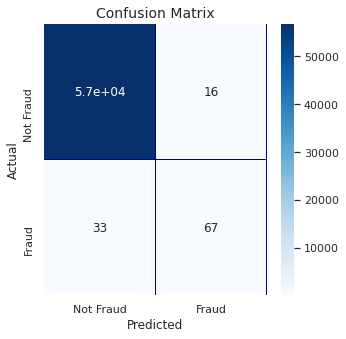

In [447]:
cm = pd.crosstab(valid_df[target].values, predss,
                rownames = ['Actual'],
                colnames = ['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
           xticklabels = ['Not Fraud','Fraud'],
           yticklabels = ['Not Fraud','Fraud'],
           annot = True,
           ax = ax1,
           linewidth = 0.2,
           linecolor = "Darkblue",
           cmap = "Blues")

plt.title('Confusion Matrix', fontsize = 14)
plt.show()

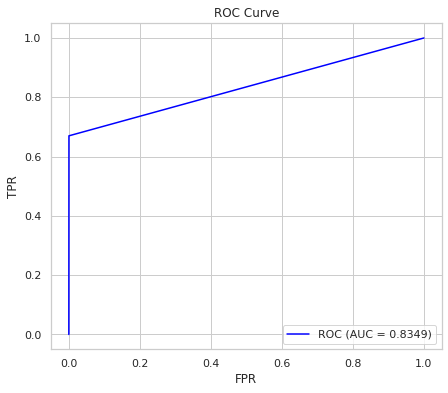

In [448]:
compute_roc_plot(valid_df[target].values, predss, plot=True)

In [449]:
auc_ada = round(roc_auc_score(valid_df[target].values, predss), 4)
auc_ada
auc_li.append(auc_ada)

The ROC-AUC score obtained with AdaBoostClassifier is <b>0.83</b>.

# CatBoost Classifier

<b>Prepare the Model</b>

In [450]:
from catboost import CatBoostClassifier

In [451]:
m = CatBoostClassifier(iterations = 500,
                      learning_rate = 0.02,
                      depth = 12,
                      eval_metric = 'AUC',
                      random_seed = randomstate,
                      bagging_temperature = 0.2,
                      od_type = 'Iter',
                      metric_period = 50, 
                      od_wait = 100)

In [452]:
%%time
m.fit(train_df[predictors], train_df[target].values, verbose = True)
cbpred = m.predict(valid_df[predictors])
acc_cb = round(accuracy_score(valid_df[target].values, cbpred),4)
acc_cb
acc_li.append(acc_cb)

0:	total: 621ms	remaining: 5m 9s
50:	total: 26.9s	remaining: 3m 56s
100:	total: 53s	remaining: 3m 29s
150:	total: 1m 19s	remaining: 3m 4s
200:	total: 1m 44s	remaining: 2m 36s
250:	total: 2m 10s	remaining: 2m 9s
300:	total: 2m 35s	remaining: 1m 42s
350:	total: 3m	remaining: 1m 16s
400:	total: 3m 24s	remaining: 50.6s
450:	total: 3m 50s	remaining: 25s
499:	total: 4m 15s	remaining: 0us
CPU times: user 13min 10s, sys: 15.2 s, total: 13min 25s
Wall time: 4min 16s


<b>Feature Importance</b>

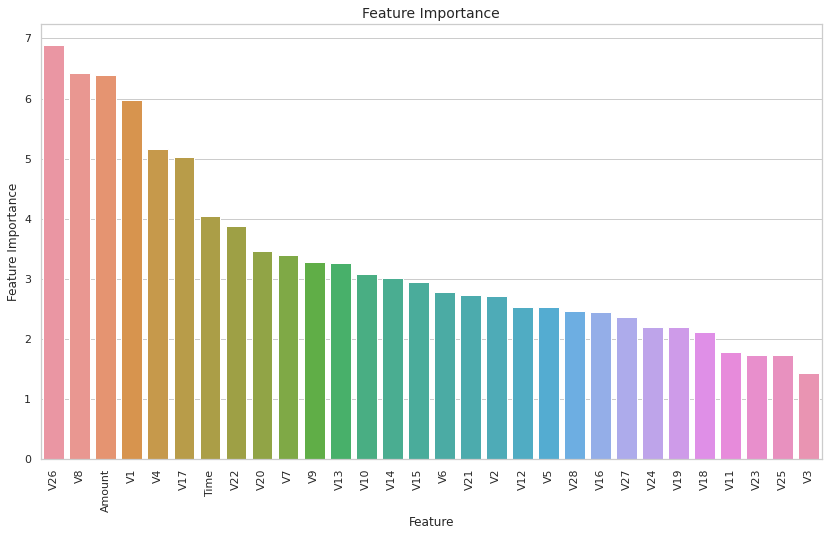

In [453]:
tmp = pd.DataFrame({'Feature' : predictors,
                   'Feature Importance' : m.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance',
                      ascending = False)
plt.figure(figsize = (14,8))
plt.title('Feature Importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

<b>The top 7 features for Cat Boost Clasifier</b>

In [454]:
tmp[:7]

,Feature,Feature Importance
26,V26,6.892720
8,V8,6.421712
29,Amount,6.389165
1,V1,5.977041
4,V4,5.162574
17,V17,5.022137
0,Time,4.045658


<b>Confusion Matrix</b>

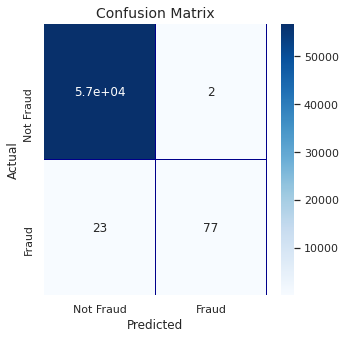

In [455]:
cm = pd.crosstab(valid_df[target].values, cbpred,
                rownames = ['Actual'],
                colnames = ['Predicted'])

fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))
sns.heatmap(cm,
           xticklabels = ['Not Fraud','Fraud'],
           yticklabels = ['Not Fraud','Fraud'],
           annot = True,
           ax = ax1,
           linewidth = 0.2,
           linecolor = "Darkblue",
           cmap = "Blues")
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

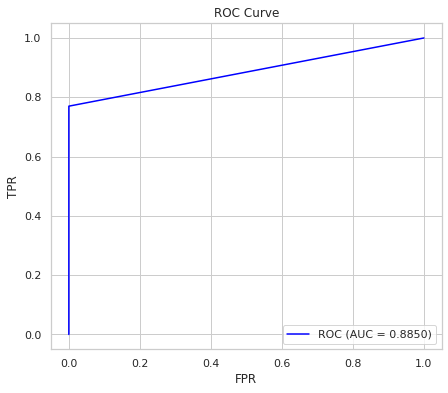

In [456]:
compute_roc_plot(valid_df[target].values, cbpred, plot=True)

In [457]:
auc_cb = round(roc_auc_score(valid_df[target].values, cbpred), 4)
auc_cb
auc_li.append(auc_cb)

The ROC-AUC score obtained with CatBoostClassifier is <b>0.88</b>

In [458]:
# Different Classification Algorithms:

# Linear Classifiers: Logistic Regression, Naive Bayes Classifier

# Nearest Neighbor

# Support Vector Machines

# Decision Trees

# Stochastic Gradient Descent

In [459]:
from sklearn import linear_model
m = linear_model.SGDClassifier(max_iter = 5,
                             tol = None)

In [460]:
# %%timeit
m.fit(train_df[predictors], train_df[target])
p = m.predict(valid_df[predictors])
acc_sgd = round(accuracy_score(valid_df[target],p),4)
acc_sgd
acc_li.append(acc_sgd)

<b>Feature Importance</b>

In [461]:
importance = m.coef_
dfa = pd.DataFrame({'Feat' : train_df[predictors].columns, 
                    'Feature Importance' : importance[0]})
# dfa.shape
dfa = dfa.sort_values(by='Feature Importance', ascending = False)

In [462]:
dfa[:7]

,Feat,Feature Importance
4,V4,77.158740
11,V11,64.896644
2,V2,64.774706
29,Amount,40.144217
21,V21,13.797026
8,V8,13.258890
19,V19,11.441171


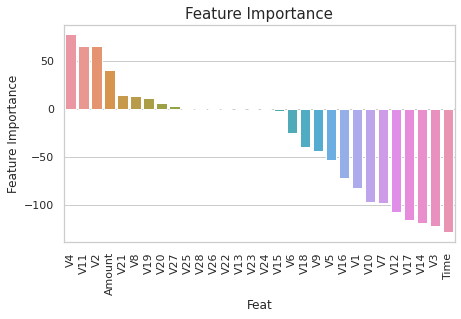

In [463]:
plt.figure(figsize = (7,4))
plt.title('Feature Importance' ,fontsize = 15)
s = sns.barplot(x = 'Feat', y = 'Feature Importance', data = dfa)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

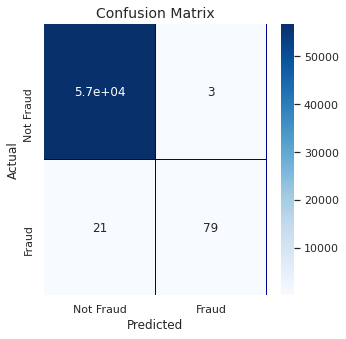

In [464]:
cm = pd.crosstab(valid_df[target], preds,
                rownames = ['Actual'],
                colnames = ['Predicted'])
fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))
sns.heatmap(cm, 
           xticklabels = ['Not Fraud', 'Fraud'],
           yticklabels = ['Not Fraud', 'Fraud'],
           annot = True,
           ax = ax1,
           linewidth = 0.2,
           linecolor = "Darkblue",
           cmap = "Blues")
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

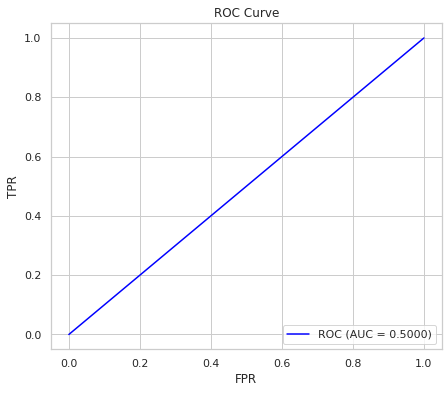

In [465]:
compute_roc_plot(valid_df[target].values, p, plot=True)

In [466]:
auc_sgd = round(roc_auc_score(valid_df[target].values, p), 4)
auc_sgd
auc_li.append(auc_sgd)

# KNN

In [467]:
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [469]:
m = KNeighborsClassifier(n_neighbors = 5)
m.fit(train_df[predictors],train_df[target])
predknn = m.predict(valid_df[predictors])
acc_knn = round(accuracy_score(valid_df[target], predknn),4)
acc_li.append(acc_knn)

<b>There is no feature_importances_ definition or coef_ feature in KNN.<b>

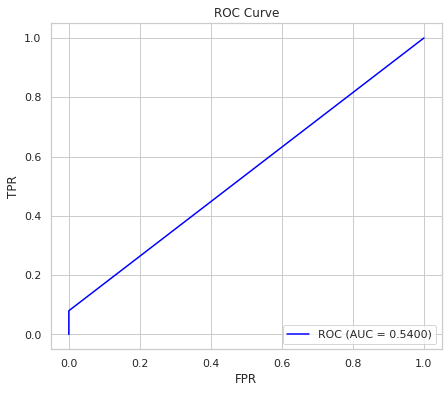

In [470]:
compute_roc_plot(valid_df[target].values, predknn, plot=True)

In [471]:
auc_knn = round(roc_auc_score(valid_df[target].values, predknn), 4)
auc_knn
auc_li.append(auc_knn)

In [472]:
var_list = dir()

In [473]:
# with_acc = [x for x in var_list if x.startswith('acc')]
# with_acc
# with_acc = ['acc_rf','acc_ada','acc_cb','acc_sgd' ,'acc_knn']

In [474]:
# with_auc = [x for x in var_list if x.startswith('auc')]
# with_auc
# with_auc = ['auc_rf', 'auc_ada', 'auc_cb', 'auc_sgd', 'auc_knn']

In [475]:
Algorithms = ['Random Forest Clf',
              'Adaboost Clf',
             'CatBoost Clf',
             'Stochastic Gradient Descent',
             'K Nearest Neighbors Clf ']

In [477]:
scores = pd.DataFrame({'Algorithms': Algorithms,
                       'Accuracy' : acc_li[:],
                      'AUC': auc_li[:]})
scores = scores.sort_values(by = ['Accuracy'], ascending = False)
scores

,Algorithms,Accuracy,AUC
3,Stochastic Gradient Descent,0.998200,0.5000
4,K Nearest Neighbors Clf,0.998400,0.5400
1,Adaboost Clf,0.999140,0.8349
0,Random Forest Clf,0.999579,0.8950
2,CatBoost Clf,0.999600,0.8850
